In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print("train_set_x_orig : " + str(train_set_x_orig.shape))
print("train_set_y : " + str(train_set_y.shape))
print("test_set_x_orig : " + str(test_set_x_orig.shape))
print("test_set_y : " + str(test_set_y.shape))

train_set_x_orig : (209, 64, 64, 3)
train_set_y : (1, 209)
test_set_x_orig : (50, 64, 64, 3)
test_set_y : (1, 50)


In [5]:
# reshape the data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print("train_set_x_flatten : " + str(train_set_x_flatten.shape))
print("test_set_x_flatten : " + str(test_set_x_flatten.shape))

# then standardize the data
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

train_set_x_flatten : (12288, 209)
test_set_x_flatten : (12288, 50)


In [6]:
# Help Funcs
## sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    s = 1 / (1 + np.exp(-z))
    """
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [7]:
## initialize_with_zeros : initialize W(T), b
def init_w_b_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [8]:
## calc_cost_grads : calc the cost value of logistic func AND the grads of W(T),b on cost func
def calc_cost_grads(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dw = (1 / m) * np.dot(X, (A - Y).T) ##If have question, ref to the teaching docments
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [9]:
## do_optimize : update W(T),b with the grads THEN repeat calc_cost_grads
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []

    for i in range(num_iterations):
        grads, cost = calc_cost_grads(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [10]:
## prediction
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [11]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = init_w_b_with_zeros(X_train.shape[0])
    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    Y_test_predict = predict(w, b, X_test)
    Y_train_predict = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predict - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_predict - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_test_predict, 
         "Y_prediction_train" : Y_train_predict, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [12]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "1.0" picture.


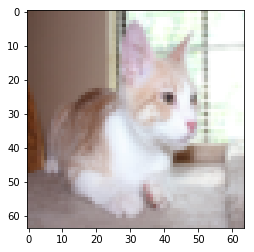

In [21]:
# Example of a picture that was wrongly classified.
index = 4 ## you can change the index to check whether your predict is right or wrong. for example, index = 5 show it is wrong
num_px = train_set_x_orig.shape[1]
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + str(d['Y_prediction_test'][0, index]) +  "\" picture.")